In [1]:

#3d plot did not work in my com but it did in ihlee comp presumably because of memory shortage
#3d prediction based on a accum.txt data file

import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ConstantKernel
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import os
import shutil

In [2]:
import pyvisa
#import keyboard
import csv

In [3]:
class Info:
    icase = 6
    icmd = 1
    a0 = -20.
    a1 = 20.
    b0 = -20.
    b1 = 20.
    ndim = 2
    ntrain0 = 36
    nn1 = 200
    nn2 = 200
    tolsig = 1e-3
    models12 = False
    rm = None
    yokogawa = None
    yokogawa2 = None
    multimeter = None

In [4]:
class GP():
    def __init__(self, ndim):
        self.ndim = ndim
        if True:
            #    kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
            self.kernel = ConstantKernel(1.0, constant_value_bounds="fixed") * \
                RBF(1.0, length_scale_bounds="fixed")
        else:
            self.kernel = DotProduct() + WhiteKernel()
        self.gp = GaussianProcessRegressor(
            kernel=self.kernel, n_restarts_optimizer=0)

    def train0(self):
        ntrain1 = 0
        if os.path.isfile('accum.txt'):
            afile = open('accum.txt', 'r')
            for line in afile:
                ntrain1 = ntrain1+1
            afile.close()
            X = np.zeros((ntrain1, self.ndim))
            y = np.zeros(ntrain1)
            i = 0
            afile = open('accum.txt', 'r')
            for line in afile:
                for j in range(self.ndim):
                    X[i, j] = float(line.split()[j])
                y[i] = float(line.split()[-1])
                i = i+1
            afile.close()
            self.gp.fit(X, y)
            del X, y, ntrain1, i, j, line

    def predict(self, X_test):
        y_pred, y_std = self.gp.predict(X_test, return_std=True)
        return y_pred, y_std

    def tpredict(self, X_test):
        ntrain01 = 0
        if os.path.isfile('accum.txt'):
            afile = open('accum.txt', 'r')
            for line in afile:
                ntrain01 = ntrain01+1
            afile.close()
            X = np.zeros((ntrain01, self.ndim))
            y = np.zeros(ntrain01)
            i = 0
            afile = open('accum.txt', 'r')
            for line in afile:
                for j in range(self.ndim):
                    X[i, j] = float(line.split()[j])
                y[i] = float(line.split()[-1])
                i = i+1
            afile.close()
            ntrain1 = i
            self.gp.fit(X, y)
            del X, y, i, ntrain1, line, ntrain01, j
        y_pred, y_std = self.gp.predict(X_test, return_std=True)
        return y_pred, y_std

In [5]:
class Multi_knn():
    def __init__(self, ndim, models12):
        self.ndim = ndim
        self.models12 = models12
        self.knn4 = KNeighborsRegressor(
            n_neighbors=4, leaf_size=30, p=2,  weights='distance')
        self.knn5 = KNeighborsRegressor(
            n_neighbors=5, leaf_size=30, p=2,  weights='distance')
        self.knn6 = KNeighborsRegressor(
            n_neighbors=6, leaf_size=30, p=2,  weights='distance')
        self.knn7 = KNeighborsRegressor(
            n_neighbors=7, leaf_size=30, p=2,  weights='distance')
        self.knn8 = KNeighborsRegressor(
            n_neighbors=8, leaf_size=30, p=2,  weights='distance')
        self.knn9 = KNeighborsRegressor(
            n_neighbors=9, leaf_size=30, p=2,  weights='distance')
        if models12:
            self.knn41 = KNeighborsRegressor(
                n_neighbors=4, leaf_size=30, p=1.5, weights='distance')
            self.knn51 = KNeighborsRegressor(
                n_neighbors=5, leaf_size=30, p=1.5, weights='distance')
            self.knn61 = KNeighborsRegressor(
                n_neighbors=6, leaf_size=30, p=1.5, weights='distance')
            self.knn71 = KNeighborsRegressor(
                n_neighbors=7, leaf_size=30, p=1.5, weights='distance')
            self.knn81 = KNeighborsRegressor(
                n_neighbors=8, leaf_size=30, p=1.5, weights='distance')
            self.knn91 = KNeighborsRegressor(
                n_neighbors=9, leaf_size=30, p=1.5, weights='distance')

    def train0(self):
        ntrain1 = 0
        if os.path.isfile('accum.txt'):
            afile = open('accum.txt', 'r')
            for line in afile:
                ntrain1 = ntrain1+1
            afile.close()
            X = np.zeros((ntrain1, self.ndim))
            y = np.zeros(ntrain1)
            i = 0
            afile = open('accum.txt', 'r')
            for line in afile:
                for j in range(self.ndim):
                    X[i, j] = float(line.split()[j])
                y[i] = float(line.split()[-1])
                i = i+1
            afile.close()
            self.knn4.fit(X, y)
            self.knn5.fit(X, y)
            self.knn6.fit(X, y)
            self.knn7.fit(X, y)
            self.knn8.fit(X, y)
            self.knn9.fit(X, y)
            if self.models12:
                self.knn41.fit(X, y)
                self.knn51.fit(X, y)
                self.knn61.fit(X, y)
                self.knn71.fit(X, y)
                self.knn81.fit(X, y)
                self.knn91.fit(X, y)
            del X, y, ntrain1, i, j, line

    def predict(self, X_test):
        anarray = []
        ypred = self.knn4.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn5.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn6.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn7.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn8.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn9.predict(X_test)
        anarray.append(ypred)
        if self.models12:
            ypred = self.knn41.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn51.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn61.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn71.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn81.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn91.predict(X_test)
            anarray.append(ypred)
        anarray = np.array(anarray)
        return np.mean(anarray), np.std(anarray)

    def tpredict(self, X_test):
        ntrain01 = 0
        if os.path.isfile('accum.txt'):
            afile = open('accum.txt', 'r')
            for line in afile:
                ntrain01 = ntrain01+1
            afile.close()
            X = np.zeros((ntrain01, self.ndim))
            y = np.zeros(ntrain01)
            i = 0
            afile = open('accum.txt', 'r')
            for line in afile:
                for j in range(self.ndim):
                    X[i, j] = float(line.split()[j])
                y[i] = float(line.split()[-1])
                i = i+1
            afile.close()
            ntrain1 = i
            self.knn4.fit(X, y)
            self.knn5.fit(X, y)
            self.knn6.fit(X, y)
            self.knn7.fit(X, y)
            self.knn8.fit(X, y)
            self.knn9.fit(X, y)
            if self.models12:
                self.knn41.fit(X, y)
                self.knn51.fit(X, y)
                self.knn61.fit(X, y)
                self.knn71.fit(X, y)
                self.knn81.fit(X, y)
                self.knn91.fit(X, y)
            del X, y, ntrain1, ntrain01, i, j, line
        anarray = []
        ypred = self.knn4.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn5.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn6.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn7.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn8.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn9.predict(X_test)
        anarray.append(ypred)
        if self.models12:
            ypred = self.knn41.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn51.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn61.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn71.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn81.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn91.predict(X_test)
            anarray.append(ypred)
        anarray = np.array(anarray)
        return np.mean(anarray), np.std(anarray)

In [6]:
alist = []
blist = []
clist = []
afile = open('accum_kim.txt', 'r')
for line in afile:
    alist.append(float(line.split()[0]))
    blist.append(float(line.split()[1]))
    clist.append(float(line.split()[2]))
afile.close()

In [7]:
Info.tolsig = 1e-3
if True:
    Info.a0 = -0.4
    Info.a1 = -0.0
    Info.b0 = -0.4
    Info.b1 = -0.
Info.ntrain0 = 36
Info.nn1 = 200
Info.nn2 = 200

In [8]:
a0 = Info.a0
a1 = Info.a1
b0 = Info.b0
b1 = Info.b1
nn1 = Info.nn1
nn2 = Info.nn2
itest = np.zeros((nn1, nn2))

ndim = Info.ndim
ntrain0 = Info.ntrain0
tolsig = Info.tolsig
models12 = Info.models12
ntrain = ntrain0

In [9]:
shutil.copyfile('accum_kim.txt', 'accum.txt')
time.sleep(0.1)
multi = Multi_knn(ndim, models12)

In [10]:
X_test = np.zeros((1, ndim))
y_pred, y_std = multi.tpredict(X_test)

36 40000 0.0009
200 200
148.4948058128357 2.4749134302139284


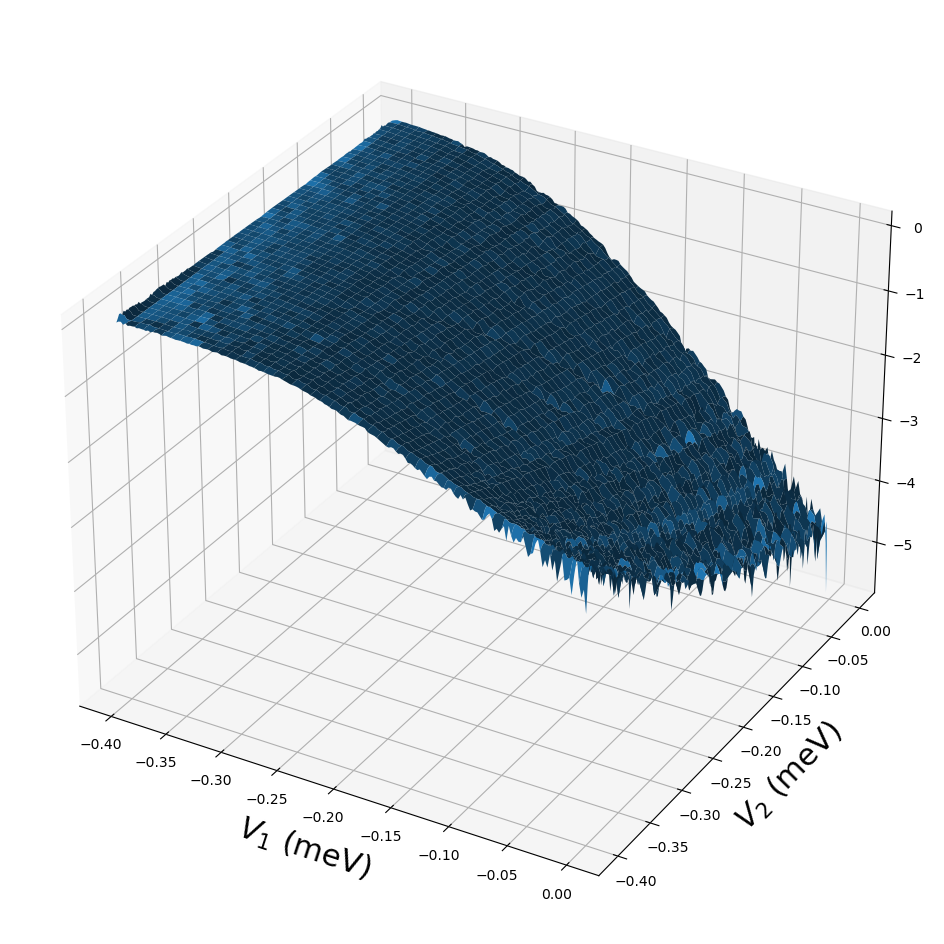

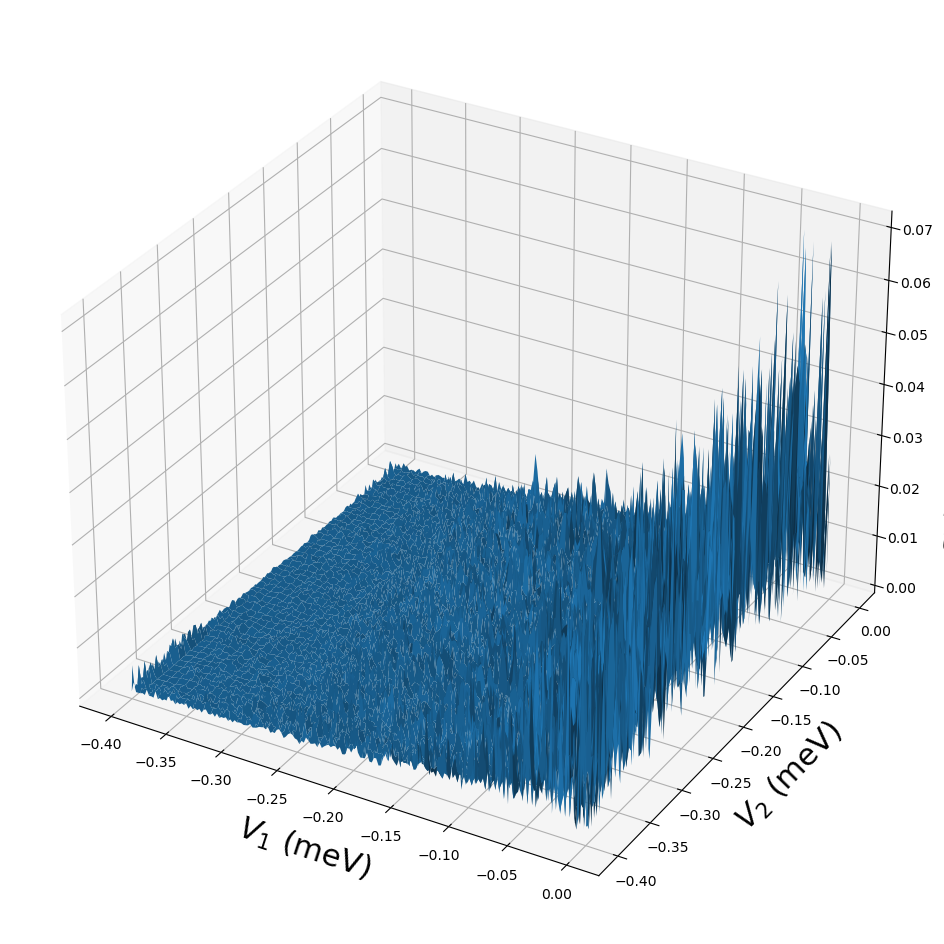

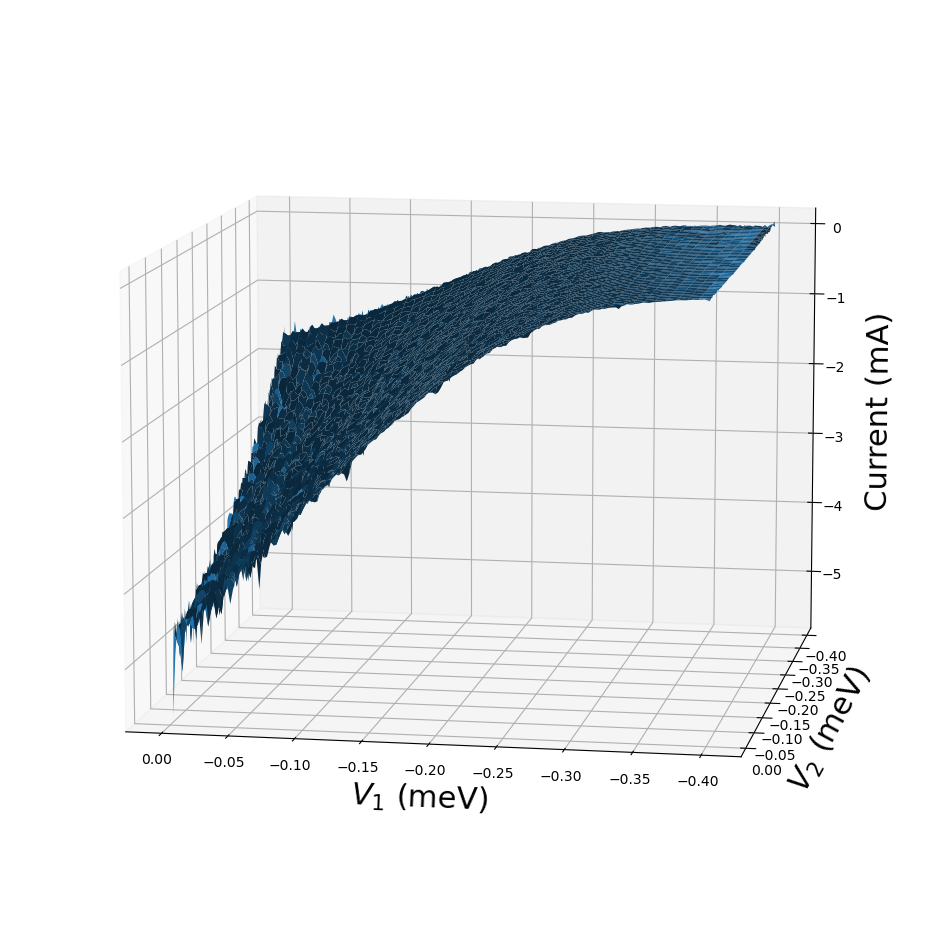

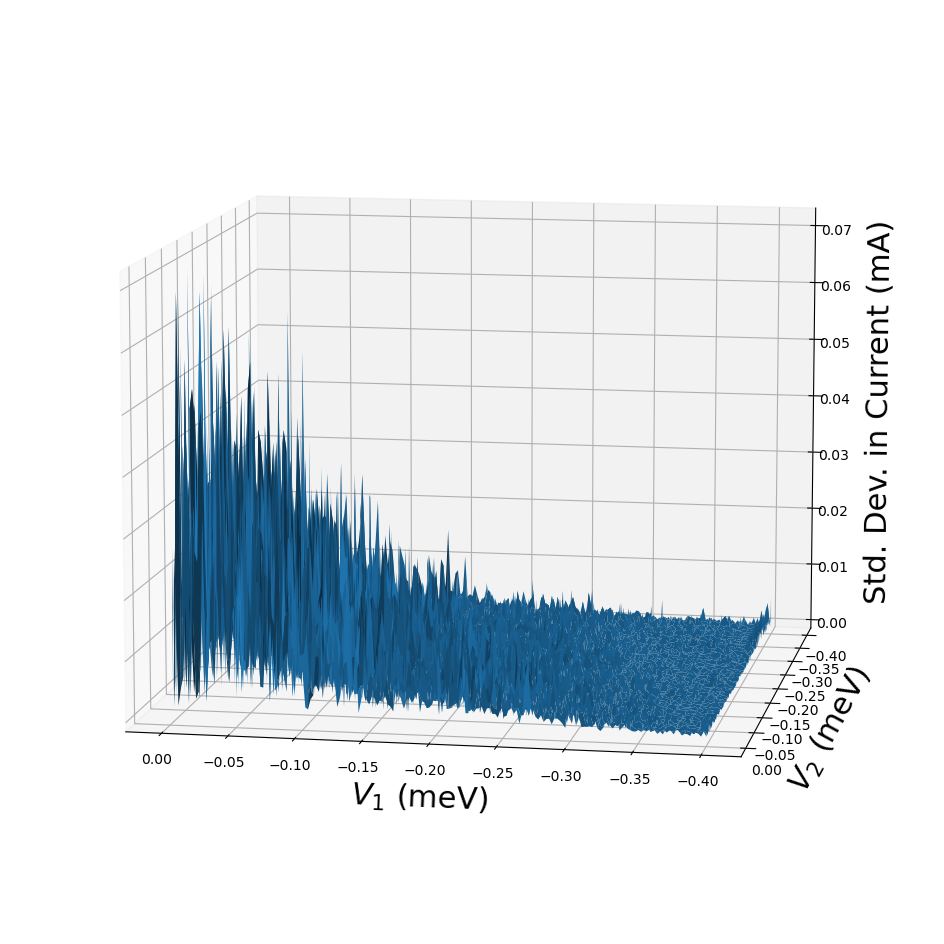

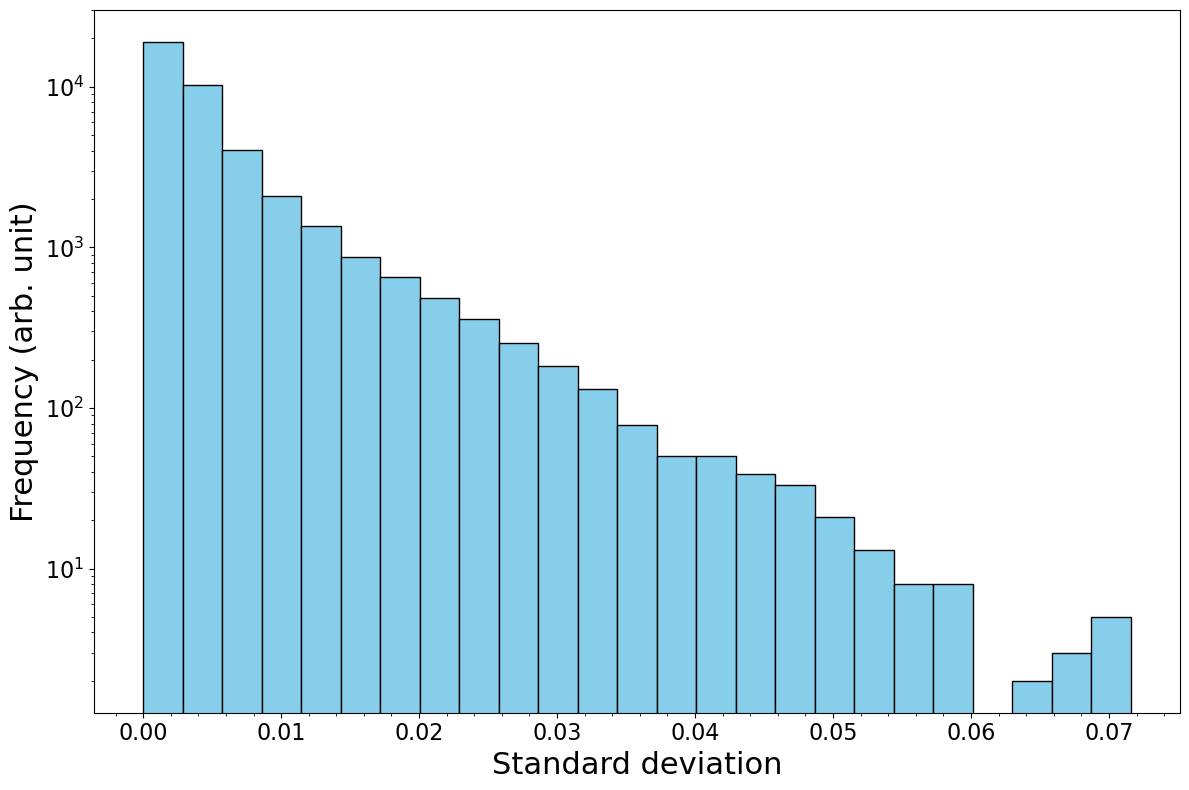

0.0052153067992118975 0.006574124157054264


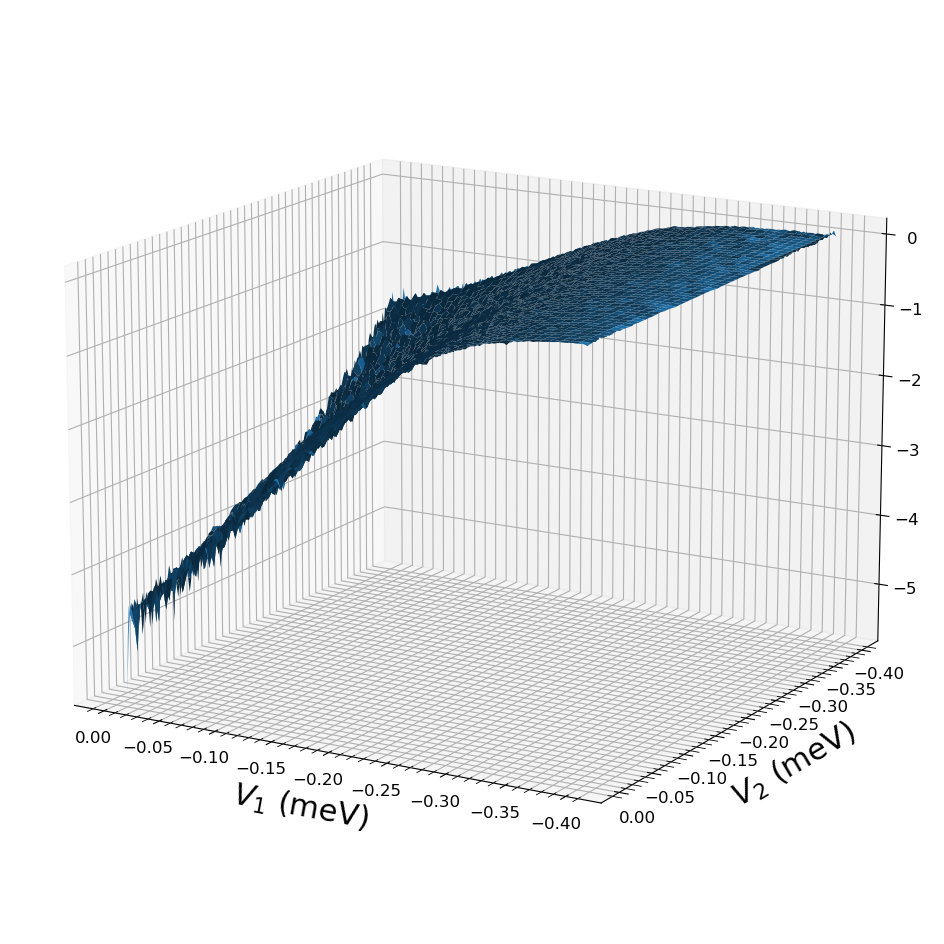

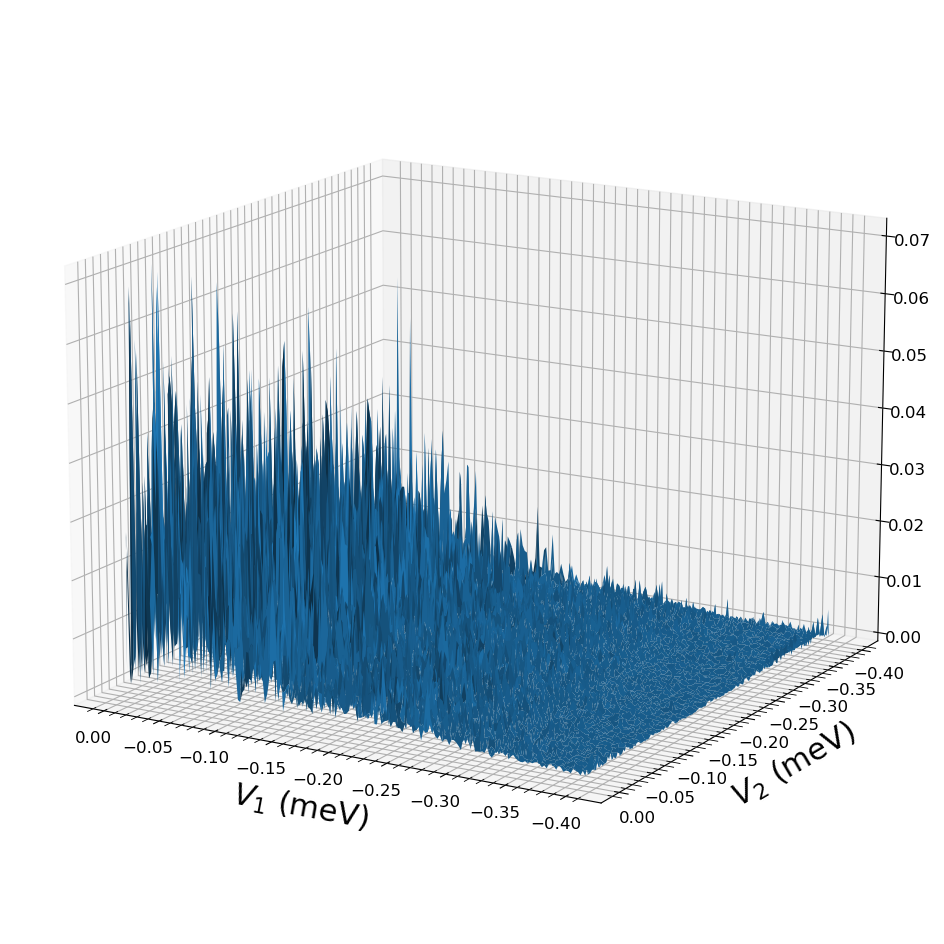

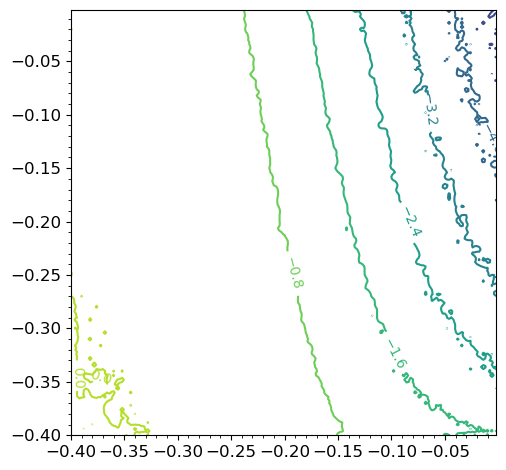

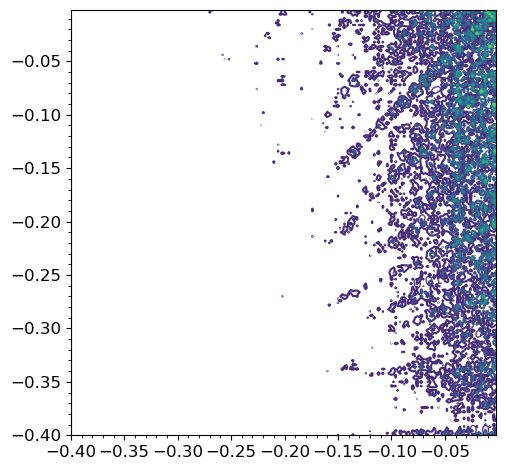

-5.70525501120354 0.0993560489494713
0.0 0.07157402525125715


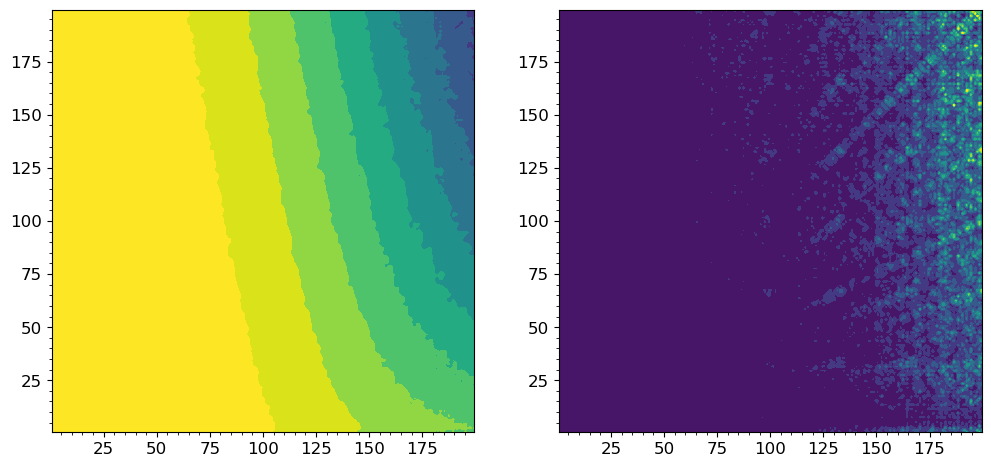

14.410378456115723 0.24017297426859538


In [11]:
if True:
    start = time.time()
    mm1 = nn1*1
    mm2 = nn2*1
    mm1 = int(mm1)
    mm2 = int(mm2)
    print(ntrain, mm1*mm2, float(ntrain)/float(mm1*mm2))
    b = np.arange(a0, a1, (a1-a0)/mm1)
    d = np.arange(b0, b1, (b1-b0)/mm2)
    B, D = np.meshgrid(b, d)
    n, m = B.shape
    print(n, m)
    nu = np.zeros((n, m))
    st = np.zeros((n, m))
    X_test = np.zeros((1, ndim))
    for i in range(n):
        for j in range(m):
            X_test[0, 0] = B[i, j]
            X_test[0, 1] = D[i, j]
            y_pred, y_std = multi.predict(X_test)
            nu[i, j] = y_pred
            st[i, j] = y_std
    end = time.time()
    print(end - start, (end-start)/60.)

    start = time.time()
    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, nu)
    plt.xlabel('$V_1$ (meV)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (meV)', fontsize=22, labelpad=10)
    ax.set_zlabel('Current (mA)', fontsize=22, rotation=0, labelpad=16)
    plt.savefig('mean.pdf')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, st)
    plt.xlabel('$V_1$ (meV)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (meV)', fontsize=22, labelpad=10)
    ax.set_zlabel('Std. Dev. in Current (mA)',
                  fontsize=18, rotation=0, labelpad=14)
    plt.savefig('std.pdf')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, nu)
    ax.view_init(elev=10., azim=100.)
    plt.xlabel('$V_1$ (meV)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (meV)', fontsize=22, labelpad=10)
    ax.set_zlabel('Current (mA)', fontsize=22, rotation=0, labelpad=16)
    plt.savefig('mean1.pdf')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, st)
    ax.view_init(elev=10., azim=100.)
    plt.xlabel('$V_1$ (meV)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (meV)', fontsize=22, labelpad=10)
    ax.set_zlabel('Std. Dev. in Current (mA)',
                  fontsize=22, rotation=0, labelpad=16)
    plt.savefig('std1.pdf')
    plt.show()
    plt.close()
    
######    
    result = st.flatten()
    fig = plt.figure(figsize=(12, 8))
    plt.rcParams["xtick.minor.visible"] = True
    plt.rcParams["ytick.minor.visible"] = True
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.hist(result, bins=25, color='skyblue', edgecolor='black')
    plt.xlabel('Standard deviation', fontsize=22)
    plt.ylabel('Frequency (arb. unit)', fontsize=22)
    plt.yscale('log')
    plt.xticks(fontsize=16)
#    plt.yticks(fontsize=19, rotation=0)
#    plt.tick_params(axis='both', which='major', labelsize=12)
#    plt.rc('xtick',labelsize=18)
#    plt.rc('ytick',labelsize=22)
    plt.tight_layout()
    plt.savefig('sig_dist_knn.pdf')
    plt.show()
    plt.close()
    print(np.mean(result), np.std(result))

    
    
    
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, nu)
    ax.view_init(elev=15., azim=120.)
    plt.xlabel('$V_1$ (meV)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (meV)', fontsize=22, labelpad=10)
    ax.set_zlabel('Current (mA)', fontsize=22, rotation=0, labelpad=16)
    plt.savefig('mean2.pdf')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, st)
    ax.view_init(elev=15., azim=120.)
    plt.xlabel('$V_1$ (meV)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (meV)', fontsize=22, labelpad=10)
    ax.set_zlabel('Std. Dev. in Current (mA)',
                  fontsize=22, rotation=0, labelpad=16)
    plt.savefig('std2.pdf')
    plt.show()
    plt.close()

    fig, ax = plt.subplots()
    CS = ax.contour(B, D, nu)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_aspect('equal', 'box')
    #ax.set_title('Simplest default with labels')
    plt.tight_layout()
    plt.savefig('mean_c.pdf')
    plt.show()
    plt.close()

    fig, ax = plt.subplots()
    CS = ax.contour(B, D, st)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_aspect('equal', 'box')
    #ax.set_title('Simplest default with labels')
    plt.tight_layout()
    plt.savefig('std_c.pdf')
    plt.show()
    plt.close()

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    ax1.set_aspect('equal', 'box')
    ax2.set_aspect('equal', 'box')
    amax = np.max(nu)
    amin = np.min(nu)
    print(amin, amax)
    tmz = (amax-amin)/10.
    ax1.contourf(nu, levels=np.arange(amin, amax, tmz),
                 extend='both', origin="lower")
    amax = np.max(st)
    amin = np.min(st)
    print(amin, amax)
    tmz = (amax-amin)/10.
    ax2.contourf(st, levels=np.arange(amin, amax, tmz),
                 extend='both', origin="lower")
    plt.savefig('mean_std.pdf')
    plt.show()
    plt.close()
    end = time.time()
    print(end - start, (end-start)/60.)